# Простые визуализации текста

### Чтение файла и поиск частотных слов

In [2]:
# укажите путь до вашего файла
with open('pin.txt', 'r', encoding='UTF-8') as f:
    text = f.read()
print(text[:50])

Часть первая

I

   В начале июля, в чрезвычайно ж


In [3]:
from string import punctuation

In [4]:
punctuation + '—'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—'

In [5]:
words = []
for word in text.split():
    good_word = word.strip(punctuation + '—').lower()
    if good_word != '':
        words.append(good_word)
words[:10]

['часть',
 'первая',
 'i',
 'в',
 'начале',
 'июля',
 'в',
 'чрезвычайно',
 'жаркое',
 'время']

In [6]:
word2number = {}  # это словарь {слово: количество вхождений}
for word in words:
    if word not in word2number:
        word2number[word] = 1
    else:
        word2number[word] += 1

Вывели частотные слова:

In [7]:
sorted(word2number.items(), key=lambda x:x[1], reverse=True)[:10]

[('и', 8452),
 ('не', 3779),
 ('в', 3726),
 ('что', 3215),
 ('он', 2852),
 ('на', 2407),
 ('я', 2398),
 ('с', 2006),
 ('а', 1775),
 ('как', 1622)]

In [8]:
from collections import Counter

In [9]:
Counter(words).most_common(10)

[('и', 8452),
 ('не', 3779),
 ('в', 3726),
 ('что', 3215),
 ('он', 2852),
 ('на', 2407),
 ('я', 2398),
 ('с', 2006),
 ('а', 1775),
 ('как', 1622)]

In [131]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

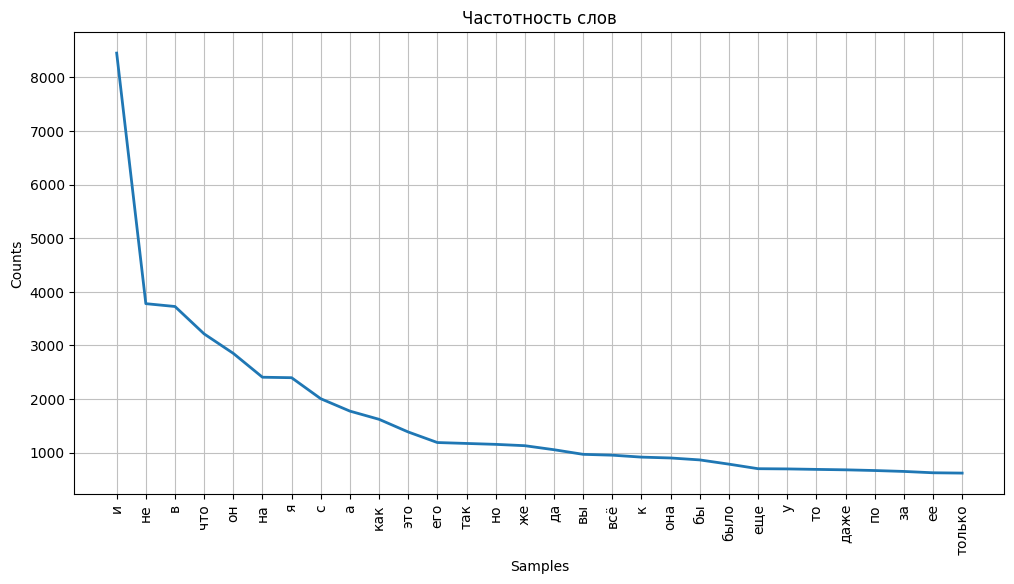

In [135]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов') # название
fdist = FreqDist(words)
fdist.plot(30, cumulative=False)

plt.show()

**Закон Ципфа:** если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то частотность n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (так называемому рангу этого слова, см. шкала порядка). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и так далее.

(Работает не только в лингвистике, закон скорее про статистику и устройство мира)

### Нарисуем немного морфологии

In [375]:
# ! pip install pymorphy2

In [163]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [164]:
parsed_words = []
for w in words:
    parsed_words.append(morph.parse(w)[0])

In [165]:
# сохраним только нужное
data = []
for word in parsed_words:
    razbor = {'lex': word.normal_form,
              'word': word.word,
              'POS': word.tag.POS,  # POS - часть речи, Part of speech
              'Род': word.tag.gender,
              'Одуш': word.tag.animacy
              }
    data.append(razbor)

In [166]:
data[4000:4010]

[{'lex': 'он', 'word': 'он', 'POS': 'NPRO', 'Род': 'masc', 'Одуш': None},
 {'lex': 'с', 'word': 'с', 'POS': 'PREP', 'Род': None, 'Одуш': None},
 {'lex': 'сугубый',
  'word': 'сугубым',
  'POS': 'ADJF',
  'Род': 'masc',
  'Одуш': None},
 {'lex': 'достоинство',
  'word': 'достоинством',
  'POS': 'NOUN',
  'Род': 'neut',
  'Одуш': 'inan'},
 {'lex': 'услышать',
  'word': 'услышав',
  'POS': 'GRND',
  'Род': None,
  'Одуш': None},
 {'lex': 'опять', 'word': 'опять', 'POS': 'ADVB', 'Род': None, 'Одуш': None},
 {'lex': 'хихиканье',
  'word': 'хихиканье',
  'POS': 'NOUN',
  'Род': 'neut',
  'Одуш': 'inan'},
 {'lex': 'но', 'word': 'но', 'POS': 'CONJ', 'Род': None, 'Одуш': None},
 {'lex': 'бог', 'word': 'боже', 'POS': 'NOUN', 'Род': 'masc', 'Одуш': 'anim'},
 {'lex': 'что', 'word': 'что', 'POS': 'CONJ', 'Род': None, 'Одуш': None}]

В таблице смотреть удобнее

In [167]:
import pandas as pd
df = pd.DataFrame(data)

In [171]:
df

,lex,word,POS,Род,Одуш
0,часть,часть,NOUN,femn,inan
1,первый,первая,ADJF,femn,None
2,i,i,None,None,None
3,в,в,PREP,None,None
4,начало,начале,NOUN,neut,inan
...,...,...,...,...,...
170078,но,но,CONJ,None,None
170079,теперешний,теперешний,ADJF,masc,None
170080,рассказ,рассказ,NOUN,masc,inan
170081,наш,наш,ADJF,masc,None


#### Что с частями речи?

In [168]:
df['POS'].value_counts()

POS
NOUN    32876
VERB    24039
CONJ    22128
NPRO    17031
ADJF    15896
PREP    15836
ADVB    15429
PRCL    13592
INFN     4981
GRND     1811
ADJS     1413
PRTF     1156
NUMR     1015
PRED      992
COMP      745
PRTS      455
INTJ      452
Name: count, dtype: int64

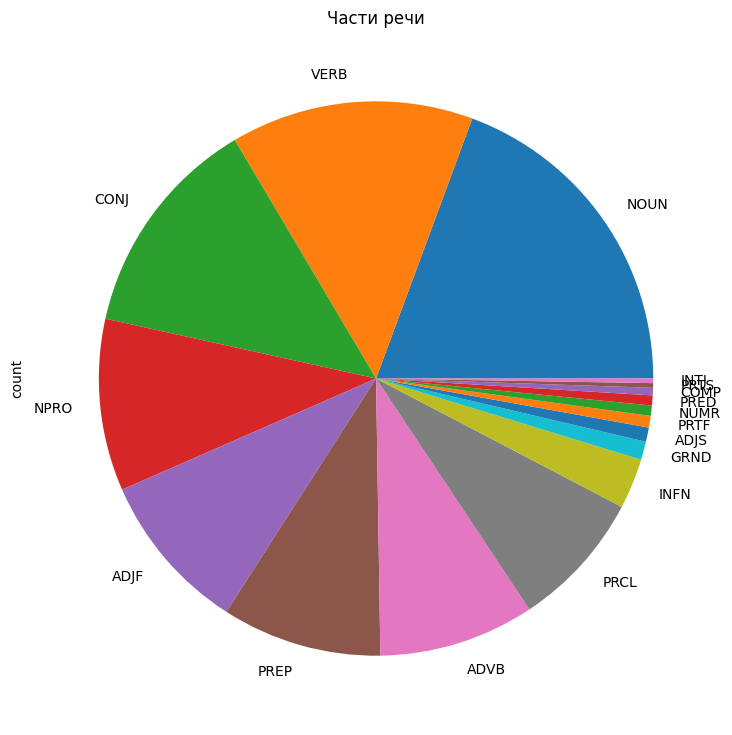

In [185]:
# Некоторыми учёными считается, что круговые диаграммы рисовать нехорошо
# ("зрение искажает реальность")
plt.figure(figsize=(9, 9))
df['POS'].value_counts().plot(kind='pie')
plt.title('Части речи')
plt.show()

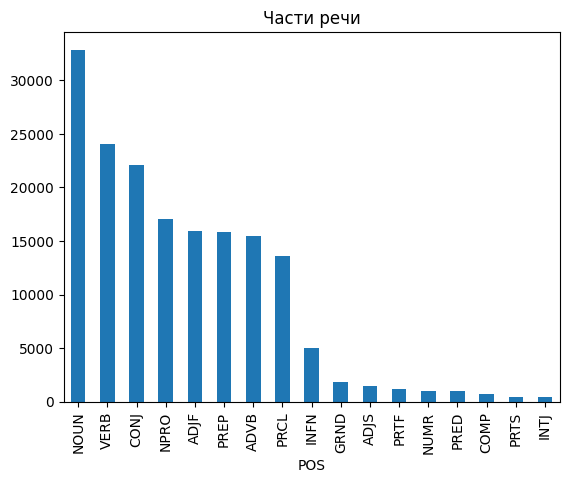

In [172]:
plt.title('Части речи')
df['POS'].value_counts().plot(kind='bar')
plt.show()

#### Посмотрим на род

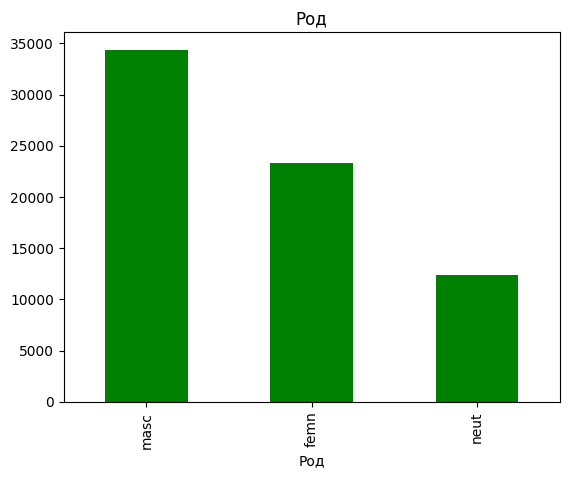

In [173]:
plt.title('Род')
df['Род'].value_counts().plot(kind='bar', color='green')
plt.show()

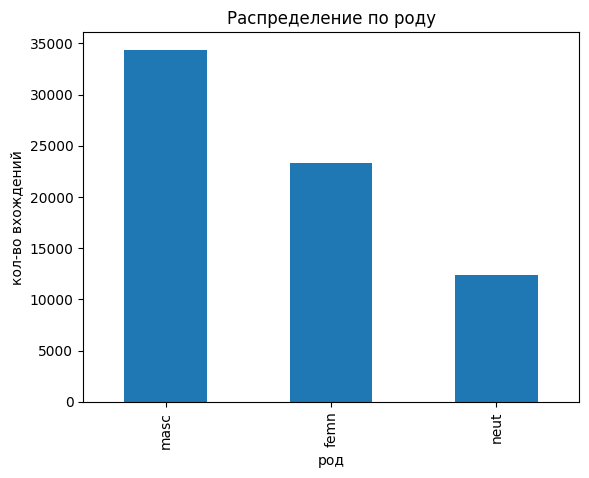

In [174]:
# добавим подписи
df['Род'].value_counts().plot.bar()
plt.title('Распределение по роду')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')
plt.show()

Посмотрим на связь рода и одушевлённости

In [186]:
df[df['Одуш']=='anim']

,lex,word,POS,Род,Одуш
14,человек,человек,NOUN,masc,anim
22,жилец,жильцов,NOUN,masc,anim
46,хозяйка,хозяйкой,NOUN,femn,anim
68,хозяйка,хозяйка,NOUN,femn,anim
79,прислуга,прислугой,NOUN,femn,anim
...,...,...,...,...,...
169662,существо,существом,NOUN,neut,anim
169682,раскольник,раскольников,NOUN,masc,anim
169702,враг,враги,NOUN,masc,anim
169876,лазарь,лазаря,NOUN,masc,anim


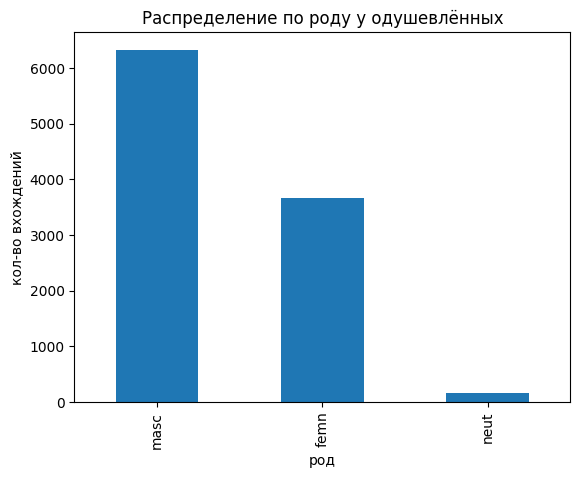

In [187]:
df[df['Одуш']=='anim']['Род'].value_counts().plot.bar()
# барплот сразу из датафрейма
plt.title('Распределение по роду у одушевлённых')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')
plt.show()

Text(0, 0.5, 'кол-во вхождений')

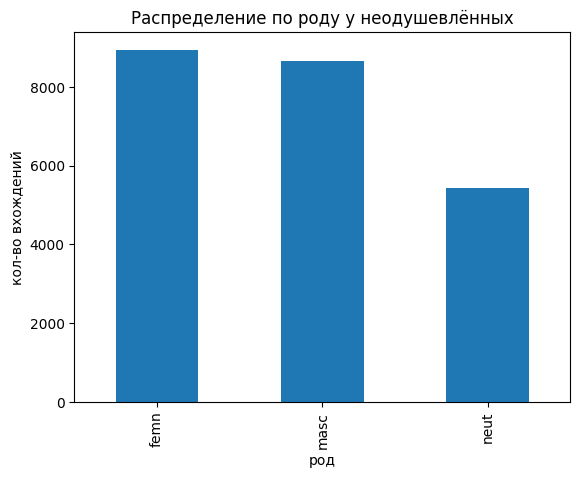

In [188]:
df[df['Одуш']=='inan']['Род'].value_counts().plot.bar()
# барплот сразу из датафрейма
plt.title('Распределение по роду у неодушевлённых')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')

### Лемматизация
(приведение слов к начальной форме)

Если вам не нравится, как лемматизирует pymorphy:

In [376]:
# ! pip3 install pymystem3

In [325]:
from pymystem3 import Mystem
m = Mystem()

In [326]:
lemmas = m.lemmatize(text)

In [327]:
lemmas[:15]

['часть',
 ' ',
 'первый',
 '\n',
 '\n',
 'I',
 '\n',
 '\n',
 '   ',
 'в',
 ' ',
 'начало',
 ' ',
 'июль',
 ', ']

### Стопслова

In [377]:
# ! pip3 install nltk

In [ ]:
import nltk

In [20]:
! python3 -m nltk.downloader stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tbkazakova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stopwords = nltk.corpus.stopwords.words('russian')
stopwords[:5]

['и', 'в', 'во', 'не', 'что']

In [23]:
stopwords.extend(['это', 'свой', 'весь', 'мочь'])

In [159]:
lemmas_notstop = [word for word in lemmas if word not in stopwords and word.isalpha()]

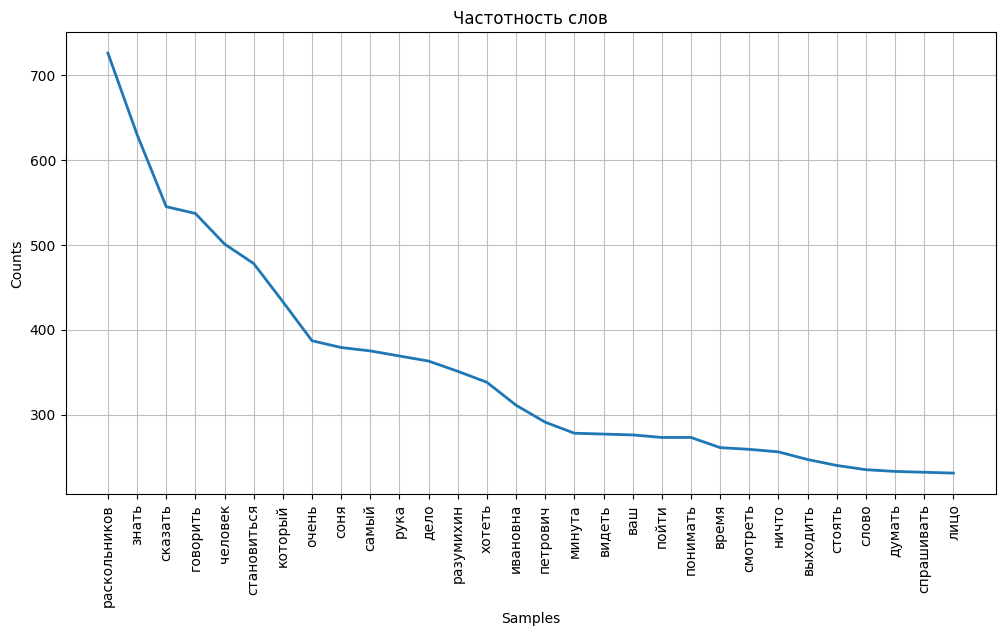

In [161]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов') # название
fdist = FreqDist(lemmas_notstop)
fdist.plot(30, cumulative=False)

plt.show()

### Облака слов

In [378]:
# ! pip3 install wordcloud

In [15]:
from wordcloud import WordCloud

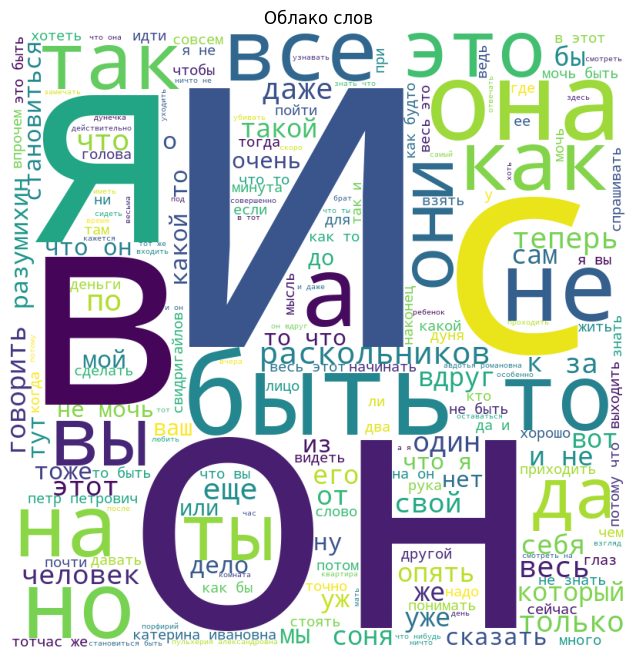

In [17]:
text_for_cloud = ' '.join(lemmas)

wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text_for_cloud)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

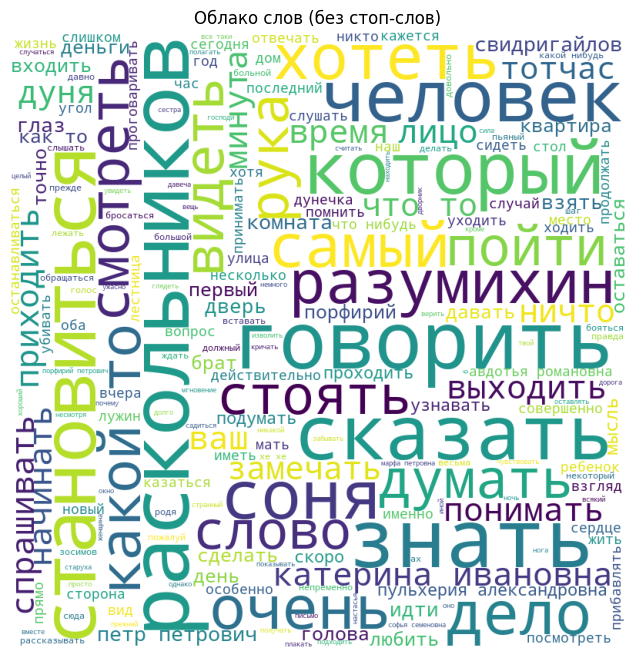

In [24]:
text_for_cloud = ' '.join([word for word in lemmas if word not in stopwords])

wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text_for_cloud)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов (без стоп-слов)')
plt.show()

### Lexical Dispersion Plot

In [25]:
from nltk.draw.dispersion import dispersion_plot

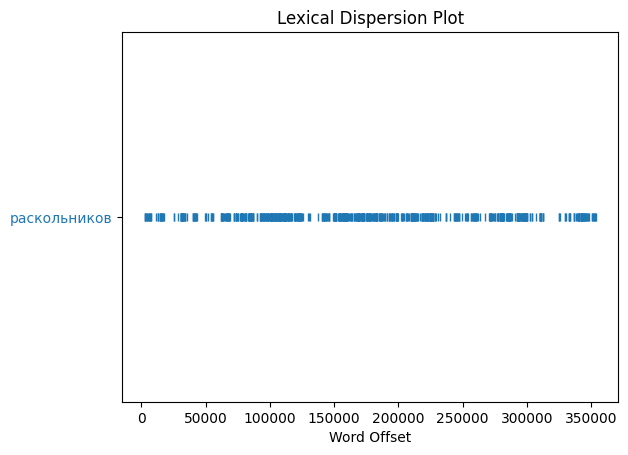

In [356]:
n = nltk.Text(lemmas)
n.dispersion_plot(["раскольников"])

У nltk проблема с отображением нескольких слов. Он показывает их в обратном порядке, лейблы снизу вверх:

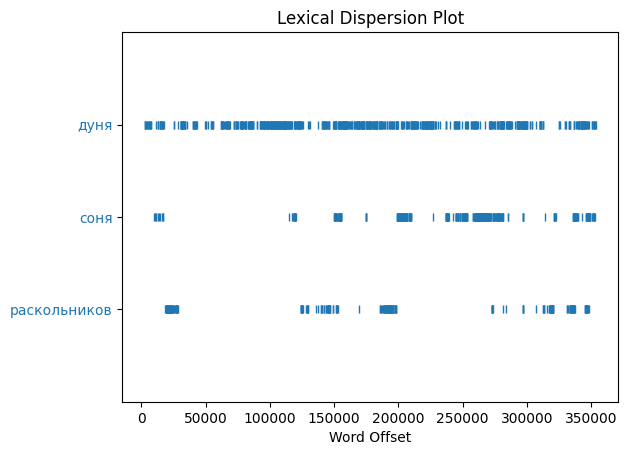

In [380]:
n.dispersion_plot(["раскольников", "соня", "дуня"])

Поэтому Артём Смирнов исправил код (за что ему честь и хвала!) и сохранил в файлик [nltk_dispersion_new.py](https://github.com/tbkazakova/compling_for_lyceum/blob/main/data/nltk_dispersion_new.py).

In [366]:
import nltk_dispersion_new

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

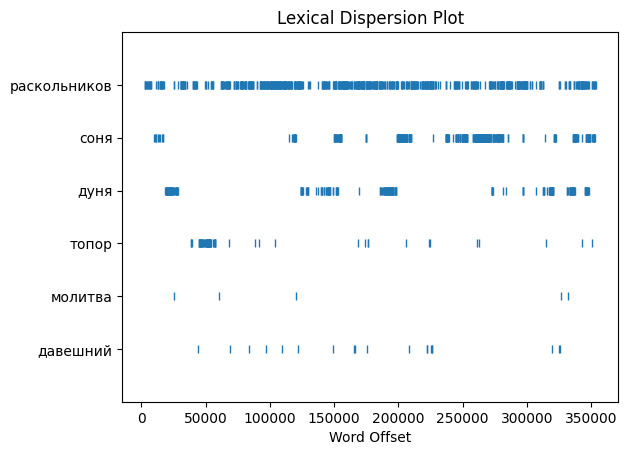

In [373]:
nltk_dispersion_new.dispersion_plot(n, ['раскольников', 'соня', 'дуня', 'топор', 'молитва', 'давешний'])

### Именнованные сущности

Это разные имена, географические названия, названия организаций и т.д. Есть автоматизированные способы достать большой процент таких слов.

NER - Named Entity Recognition - распознавание именнованных сущностей.

Есть ещё в spacy, но сейчас посмотрим NamesExtractor из natasha

In [381]:
# ! pip3 install natasha

In [28]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [29]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

### Микропример:

In [108]:
example = "Привет, Денис! Ты был c Романом Ронько в Пушкинском музее в Москве (я про Государственный музей изобразительных искусств имени А.С. Пушкина)? Увидел Лизавету. С Дуней."

In [109]:
doc0 = Doc(example)
doc0

Doc(text='Привет, Денис! Ты был Романом Ронько в Пушкинском...)

In [110]:
doc0.segment(segmenter)

In [111]:
doc0

Doc(text='Привет, Денис! Ты был Романом Ронько в Пушкинском..., tokens=[...], sents=[...])

In [112]:
print(doc0.tokens[:5])
print(doc0.sents[:5])

[DocToken(stop=6, text='Привет'), DocToken(start=6, stop=7, text=','), DocToken(start=8, stop=13, text='Денис'), DocToken(start=13, stop=14, text='!'), DocToken(start=15, stop=17, text='Ты')]
[DocSent(stop=14, text='Привет, Денис!', tokens=[...]), DocSent(start=15, stop=156, text='Ты был Романом Ронько в Пушкинском музее в Москве..., tokens=[...]), DocSent(start=157, stop=162, text='Дуней', tokens=[...])]


In [113]:
doc0.tag_morph(morph_tagger)

In [114]:
doc0.sents[0].morph.print()

              Привет PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                   , PUNCT
               Денис PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                   ! PUNCT


In [115]:
for token in doc0.tokens:
    token.lemmatize(morph_vocab)
print(doc0.tokens[:5])

[DocToken(stop=6, text='Привет', pos='PROPN', feats=<Anim,Nom,Masc,Sing>, lemma='привет'), DocToken(start=6, stop=7, text=',', pos='PUNCT', lemma=','), DocToken(start=8, stop=13, text='Денис', pos='PROPN', feats=<Anim,Nom,Masc,Sing>, lemma='денис'), DocToken(start=13, stop=14, text='!', pos='PUNCT', lemma='!'), DocToken(start=15, stop=17, text='Ты', pos='PRON', feats=<Nom,Sing,2>, lemma='ты')]


In [116]:
doc0.tag_ner(ner_tagger)

In [117]:
doc0

Doc(text='Привет, Денис! Ты был Романом Ронько в Пушкинском..., tokens=[...], spans=[...], sents=[...])

In [118]:
for span in doc0.spans:
    span.normalize(morph_vocab)
print(doc0.spans)

[DocSpan(start=8, stop=13, type='PER', text='Денис', tokens=[...], normal='Денис'), DocSpan(start=22, stop=36, type='PER', text='Романом Ронько', tokens=[...], normal='Роман Ронько'), DocSpan(start=39, stop=55, type='ORG', text='Пушкинском музее', tokens=[...], normal='Пушкинский музей'), DocSpan(start=58, stop=64, type='LOC', text='Москве', tokens=[...], normal='Москва'), DocSpan(start=72, stop=137, type='ORG', text='Государственный музей изобразительных искусств им..., tokens=[...], normal='Государственный музей изобразительные искусства и...), DocSpan(start=147, stop=155, type='PER', text='Лизавету', tokens=[...], normal='Лизавету'), DocSpan(start=157, stop=162, type='PER', text='Дуней', tokens=[...], normal='Дуней')]


In [119]:
for span in doc0.spans:
    if span.type == 'PER':
        print(span.normal)

Денис
Роман Ронько
Лизавету
Дуней


Запомним, что такая нормализация имён вызывает затруднения.

### Вернёмся к тексту

In [42]:
normal_names = []
doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.tag_ner(ner_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)
for span in doc.spans:
    span.normalize(morph_vocab)
    if span.type == 'PER':
        normal_names.append(span.normal)

In [47]:
normal_names[:20]  # tag_ner делит NE по типам, но в имена записывает довольно много мусора
# А вот names_extractor хорошо понимает, как должны выглядеть имена, но не умеет определять тип NE
# Горох - царь Горох

['Горохе',
 'Раскольников',
 'Раскольников',
 'Раскольников',
 'Алена Ивановна',
 'Алена Ивановна',
 'Алена Ивановна',
 'Раскольников',
 'Оглядевшись',
 'Раскольников',
 'Цел-лый',
 'По Подьяческой',
 'Раскольников',
 'Раскольников',
 'Раскольников',
 'Мармеладов --',
 'Раскольников',
 'Лебезятников',
 'Раскольников',
 'Мармеладов']

In [382]:
# микропример
matches = list(names_extractor('Оглядевшись, Таня Казакова увидела Файера Владимира Владимировича.'))
matches

[Match(
     start=13,
     stop=26,
     fact=Name(
         first='Таня',
         last='Казакова',
         middle=None
     )
 ),
 Match(
     start=35,
     stop=65,
     fact=Name(
         first='Владимира',
         last='Файера',
         middle='Владимировича'
     )
 )]

In [65]:
# можно смотреть ифо у нормализованных имён 
for name in normal_names[:5]:
    matches = list(names_extractor(name))
    print(matches)

[Match(start=0, stop=6, fact=Name(first=None, last='Горохе', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=12, fact=Name(first=None, last='Раскольников', middle=None))]
[Match(start=0, stop=14, fact=Name(first='Алена', last='Ивановна', middle=None))]


In [49]:
# а можно names_extractor у ненормализованных спанов с тегом PER
for span in doc.spans:
    if span.type == PER:
        span.extract_fact(names_extractor)

In [384]:
# если там есть fact, там есть ИФО
for span in doc.spans[:16]:
    if span.fact:
        print(span.fact.slots)

[Slot(key='last', value='Горохе')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='first', value='Алена'), Slot(key='last', value='Ивановна')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Раскольников')]
[Slot(key='last', value='Цел')]
[Slot(key='last', value='По')]
[Slot(key='last', value='Раскольников')]


Нормализация в mystem сильнее (например, "Дуней" > "Дуня", а не "Дуней" > "Дуней")

In [125]:
name_lem = []
for span in doc.spans:
  if span.fact:
      name = ''
      for slot in span.fact.slots:   # вытаскиваем из слотов имя, фамилию или отчество
          name += m.lemmatize(slot.value)[0] + ' ' # и будем лемматизировать их с помощью Mystem
      name_lem.append(name.strip() if len(name)>3 else '') # избавляемся от По, К, Ай и др.

In [400]:
len(set(name_lem)), list(set(name_lem))[15:35]

(252,
 ['вразумихин',
  'катышек',
  'бабушкин',
  'босенький',
  'юсупов',
  'генриета',
  'ливингстон',
  'ромео',
  'наталья егоровна',
  'кеплеров',
  'дмитрий',
  'родька',
  'починковый',
  'коля',
  'марфа',
  'огарок',
  'дунечка',
  'льюис',
  'фомич',
  'шулер'])

Помимо очевидного мусора есть большие проблемы.
1. Одного человека могут звать 5-10 способами (это решается с помощью словаря соответствий)
2. Разных людей могут называть одним именем (сильно усложняет, это надо по контексту определять) (Иван Афанасьевич, Иван Иванович, Иван Михайлыч - если в тексте просто "Иван", это кто?)
3. Бабушкин и чиновник, и сон (смешение имён собственных и нарицательных) 

In [337]:
name_mapping = {
  'авдотья': 'Авдотья Романовна Раскольникова',
  'авдотья раскольникова романовна': 'Авдотья Романовна Раскольникова',
  'авдотья романовна': 'Авдотья Романовна Раскольникова',
  'александр григорьевич': 'Александр Григорьевич Заметов',
  'алексей семенович': 'Алексей Семенович',
  'алена': 'Старуха-процентщица',
  'алена ивановна': 'Старуха-процентщица',
  'алешка': 'Алексей Семенович',
  'али зосимов': 'Зосимов',
  'амалия': 'Липпевехзель',
  'амалия ивановна': 'Липпевехзель',
  'амалия липпевехзель': 'Липпевехзель',
  'амалия липпевехзель федоровна': 'Липпевехзель',
  'амалия людвиговна': 'Липпевехзель',
  'амалия федоровна': 'Липпевехзель',
  'амаль': 'Липпевехзель',
  'амаль людвиговна': 'Липпевехзель',
  'андрей': 'Лебезятников',
  'андрей лебезятник семенович': 'Лебезятников',
  'андрей лебезятник семеныч': 'Лебезятников',
  'андрей семенович': 'Лебезятников',
  'андрей семеныч': 'Лебезятников',
  'аркадий': 'Свидригайлов',
  'аркадий иванович': 'Свидригайлов',
  'аркадий свидригайлов иванович': 'Свидригайлов',
  'афанасий': 'Вахрушин',
  'афанасий вахрушин иванович': 'Вахрушин',
  'афанасий иванович': 'Вахрушин',
  'афанасий павлыч': 'Афанасий Павлович',
  'бабушкин': 'Бабушкин',
  'бакалеев': 'Бакалеев',
  'берг': 'Берг',
  'вася': 'Вася',
  'вахрушин': 'Вахрушин',
  'вразумихин': 'Разумихин',
  'гертруда карловна': 'Ресслих',
  'гертруда ресслиха карловна': 'Ресслих',
  'дарья францевна': 'Дарья Францевна',
  'дмитрий': 'Разумихин',
  'дун': 'Дуня',
  'дунечка': 'Дуня',
  'дунечкин': 'Дуня',
  'дуня': 'Дуня',
  'дуня любить': 'Дуня',
  'заметов': 'Заметов',
  'заметова': 'Заметов',
  'зарницын': 'Зарницына',
  'зарницына': 'Зарницына',
  'зосимов': 'Зосимов',
  'зосимов разумихин': 'Зосимов',
  'зосимова': 'Зосимов',
  'иван афанасьевич': 'Иван Афанасьевич',
  'иван иванович': 'Иван Иванович',
  'иван михайлыч': 'Иван Михайлыч',
  'илья петрович': 'Порох',
  'илья порох петрович': 'Порох',
  'капернаумов': 'Капернаумов',
  'катерина': 'Катерина Ивановна',
  'катерина ивановна': 'Катерина Ивановна',
  'катерина раскольников ивановна': 'Катерина Ивановна',
  'катерина смешливый ивановна': 'Катерина Ивановна',
  'катя': 'Катерина Ивановна',
  'катя начинать': 'Катерина Ивановна',
  'колька': 'Миколка',
  'коля': 'Миколка',
  'кох': 'Кох',
  'лавиза': 'Лизавета Ивановна',
  'лавиза ивановна': 'Лизавета Ивановна',
  'лазарь': 'Лазарь',
  'лебезятник': 'Лебезятников',
  'лебезятников': 'Лебезятников',
  'лидочка': 'Лидочка Мармеладова',
  'лизавета': 'Лизавета Ивановна',
  'лизавета ивановна': 'Лизавета Ивановна',
  'лизаветин': 'Лизавета Ивановна',
  'лужин': 'Лужин',
  'луиза ивановна': 'Лизавета Ивановна',
  'мармеладов': 'Мармеладов',
  'марфа': 'Марфа Петровна Свидригайлова',
  'марфа петровна': 'Марфа Петровна Свидригайлова',
  'матвей': 'Матвей',
  'миколай': 'Миколка',
  'миколай дементьев': 'Миколка',
  'миколка': 'Миколка',
  'миколка молодец': 'Миколка',
  'митрей': 'Митрей',
  'митька': 'Митька',
  'настасья': 'Настасья',
  'настасья никифоровна': 'Настасья',
  'настенька': 'Настасья',
  'наталья егоровна': 'Наталья Егоровна',
  'никифоров': 'Настасья',
  'никодим': 'Никодим Фомич',
  'никодим фомич': 'Никодим Фомич',
  'николай': 'Миколка',
  'николашка': 'Миколка',
  'нил павлыч': 'Нил Павлыч',
  'п лужин': 'Лужин',
  'параша': 'Пашенька',
  'пашенька': 'Пашенька',
  'пестряков': 'Пестряков',
  'петр': 'Лужин',
  'петр лужин петрович': 'Лужин',
  'петр петрович': 'Лужин',
  'петр разумихин петрович': 'Лужин',
  'петров': 'Лужин',
  'пол': 'Полечка Мармеладова',
  'поле': 'Полечка Мармеладова',
  'поленька': 'Полечка Мармеладова',
  'полечка': 'Полечка Мармеладова',
  'полина михайловна': 'Полечка Мармеладова',
  'поля': 'Полечка Мармеладова',
  'порох': 'Порох',
  'порфирий': 'Порфирий Петрович',
  'порфирий петрович': 'Порфирий Петрович',
  'порфирий раскольников петрович': 'Порфирий Петрович',
  'прасковья': 'Зарницына',
  'прасковья павловна': 'Зарницына',
  'прилукова': 'Прилукова',
  'пульхерия александровна': 'Пульхерия Александровна',
  'пульхерия раскольников': 'Пульхерия Александровна',
  'пульхерия раскольников александровна': 'Пульхерия Александровна',
  'разумихин': 'Разумихин',
  'разумихина': 'Разумихин',
  'раскольников': 'Раскольников',
  'рассудкин': 'Рассудкин',
  'род': 'Раскольников',
  'родион': 'Раскольников',
  'родион раскольников': 'Раскольников',
  'родион раскольников романович': 'Раскольников',
  'родион ро': 'Раскольников',
  'родион романович': 'Раскольников',
  'родион романыч': 'Раскольников',
  'родька': 'Раскольников',
  'родькин': 'Раскольников',
  'родя': 'Раскольников',
  'свидригайлов': 'Свидригайлов',
  'семен захарович': 'Мармеладов',
  'семен захарыч': 'Мармеладов',
  'семен семенович': 'Семён Семёнович',
  'сонечка': 'Соня',
  'сонечка мармеладов': 'Соня',
  'сонечкин': 'Соня',
  'соня': 'Соня',
  'соня разумихин': 'Соня',
  'софья': 'Соня',
  'софья мармеладов семеновна': 'Соня',
  'софья семеновна': 'Соня',
  'теребьев': 'Теребьева',
  'федосья': 'Федосья',
  'филипп': 'Филипп',
  'филька': 'Филипп',
  'фомич': 'Никодим Фомич',
  'циммерман': 'Цимерман',
  'чебаров': 'Чебаров',
  'шиллер': 'Шиллер',
  'шиль': 'Шиль',
  'щегольской': 'князь Щегольской',
  'юшин': 'купец Юшин'}

Хочется нарисовать граф связей, кто с кем взаимодействует в тексте.

Идём по спанам PER. Если предыдущий в списке и этот персонаж на расстоянии друг от друга не больше X (например, небольше 100 символов), то сохраняем, что они встретились вместе. А потом граф, где вершины персонажи, а рёбра связи.

В [статье Системного Блока](https://vk.com/@sysblok-socseti-russkoi-dramy-chast-i-osnovy-setevogo-analiza) подробный рассказ и с картинками

[DraCor](https://dracor.org/) - корпуса пьес, с подобной разметкой: можно посмотреть на граф и скачать в разных форматах информацию о том, кто с кем разговаривал и кому кем приходится.

### Граф связей

In [401]:
# NetworkX - отличная библиотека для графов
# ! pip install networkx

In [243]:
import networkx as nx

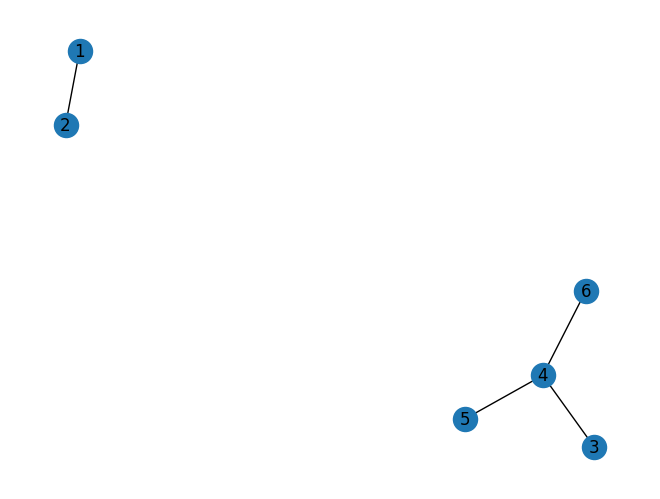

In [244]:
G = nx.Graph()
G.add_edges_from([(3, 4), (4, 5), (1, 2), (4, 6)])

nx.draw(G, with_labels=True)

In [338]:
prevname = ''
stop = - 100
all_pairs = {}
for span in doc.spans:
    if span.fact:
        name = ''
        for slot in span.fact.slots:   # вытаскиваем из слотов имя, фамилию или отчество
            name += m.lemmatize(slot.value)[0] + ' ' # и будем лемматизируем
        name = name.strip() if len(name)>3 else ''
        if name in name_mapping:
            common_name = name_mapping[name]
            start = span.stop
            if start-stop < 100 and prevname != common_name:  # Сохраняем пару, если расстояние между героями меньше 100 символов
                pair = tuple(sorted([prevname, common_name]))
                if pair not in all_pairs:
                    all_pairs[pair] = 1
                else:
                    all_pairs[pair] += 1

            stop = span.stop
            prevname = common_name

In [339]:
max_con = max(all_pairs[i] for i in all_pairs)
max_con # есть персонажи, которые встретились рядом 83 раза

83

In [340]:
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    w = all_pairs[pair] / max_cnt
    # добавить в граф ребро от n1 к n2 с весом w
    G.add_edge(n1, n2, weight=w)

In [341]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

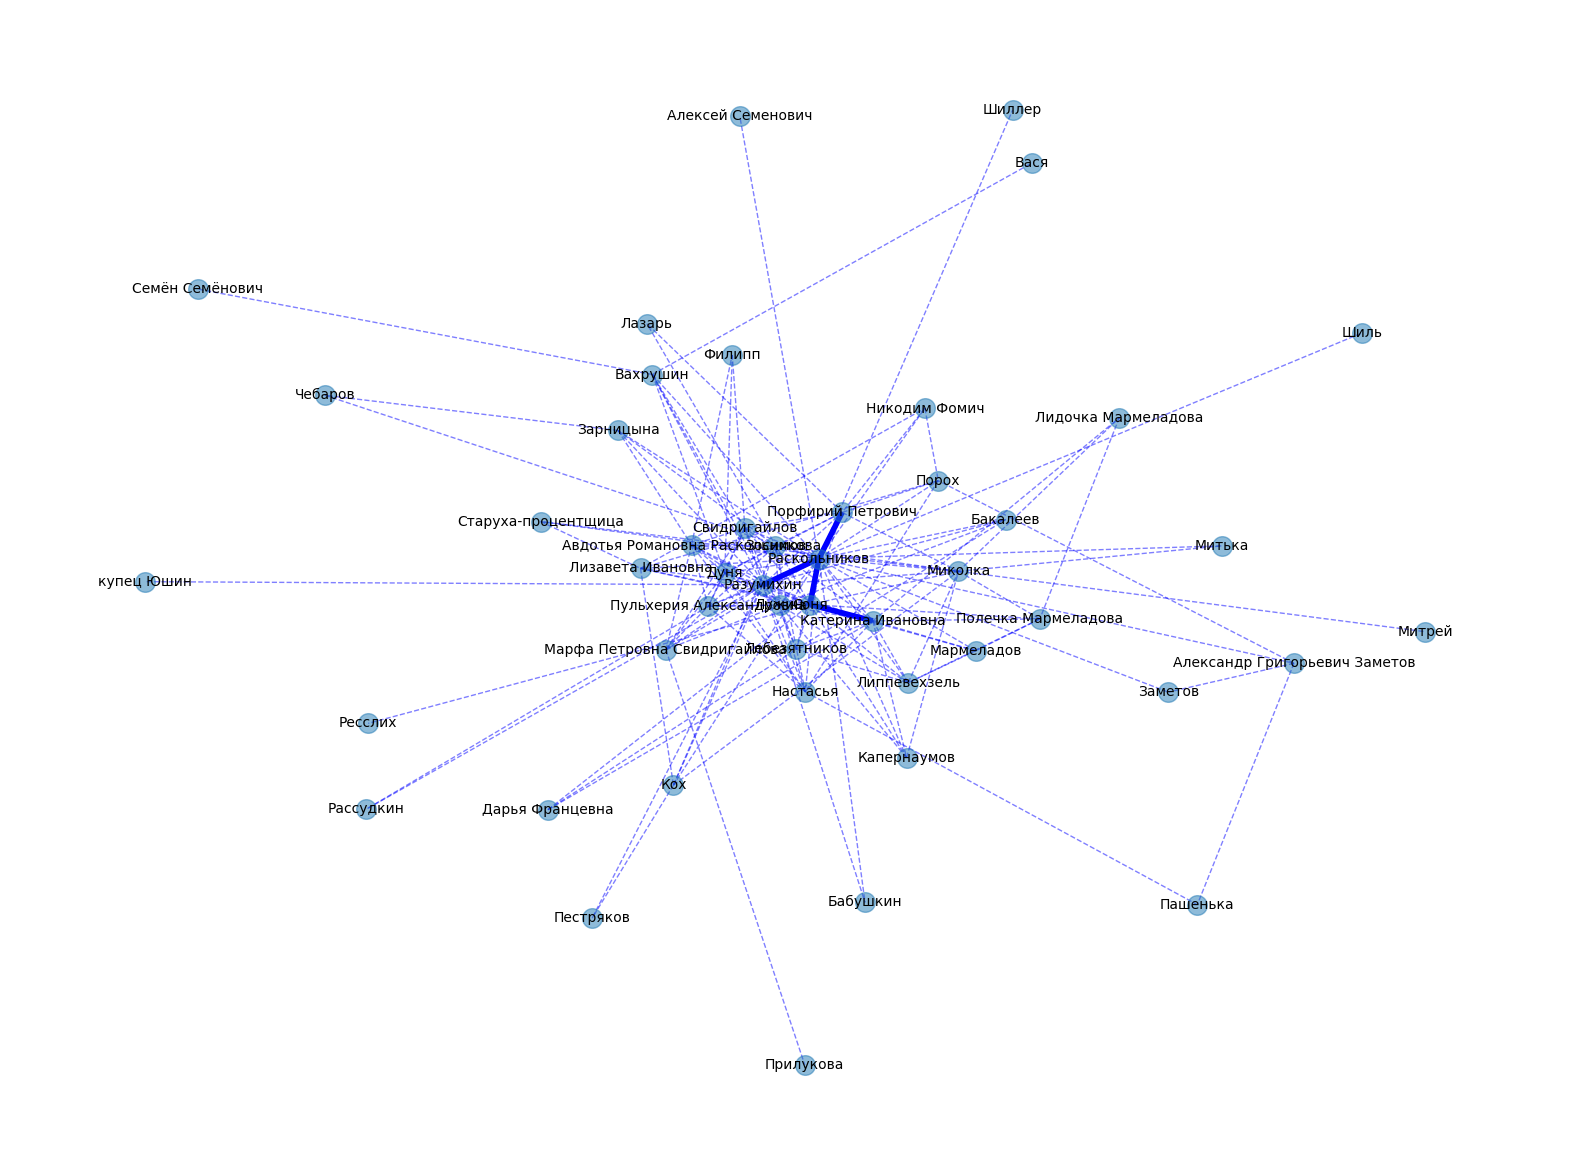

In [342]:
# у графов много разных раскладок (способов расположить вешины)
pos = nx.spring_layout(G)  # часто используют этот

plt.figure(figsize=(20, 15))

# рисуем вершины
nx.draw_networkx_nodes(G, pos, node_size=200, alpha=0.5)
# рисуем популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4, edge_color='b')
# рисуем менее популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='b', style='dashed')
# подписи
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

Пусть размеры вершин соответствуют частотности персонажей

In [343]:
# вершины
G.nodes

NodeView(('Раскольников', 'Старуха-процентщица', 'Мармеладов', 'Дарья Францевна', 'Катерина Ивановна', 'Соня', 'Лебезятников', 'Капернаумов', 'Липпевехзель', 'Дуня', 'Свидригайлов', 'Марфа Петровна Свидригайлова', 'Лужин', 'Вахрушин', 'Пульхерия Александровна', 'Разумихин', 'Лизавета Ивановна', 'Кох', 'Александр Григорьевич Заметов', 'Зарницына', 'Чебаров', 'Никодим Фомич', 'Порох', 'Настасья', 'Семён Семёнович', 'Зосимов', 'Пашенька', 'Миколка', 'Митрей', 'Пестряков', 'Бакалеев', 'купец Юшин', 'Заметов', 'Бабушкин', 'Митька', 'Алексей Семенович', 'Шиль', 'Лидочка Мармеладова', 'Полечка Мармеладова', 'Авдотья Романовна Раскольникова', 'Вася', 'Порфирий Петрович', 'Ресслих', 'Лазарь', 'Прилукова', 'Филипп', 'Рассудкин', 'Шиллер'))

In [344]:
persons = {}
for person in G.nodes:
    persons[person] = 0
for person in G.nodes:
    for pair in all_pairs:
        if person in pair:
            persons[person] += 1

In [345]:
import numpy as np

In [346]:
# вот такие у нас будут веса
sizes = np.array(list(persons.values()))
sizes *= 15
sizes

array([495,  45,  75,  45, 210, 285, 120,  75, 120, 195, 180, 120, 225,
       105, 165, 330, 120,  90,  60,  75,  30,  60,  90, 150,  15, 165,
        30, 195,  15,  30,  60,  15,  30,  30,  30,  15,  15,  45,  90,
       180,  15, 150,  15,  30,  15,  45,  30,  15])

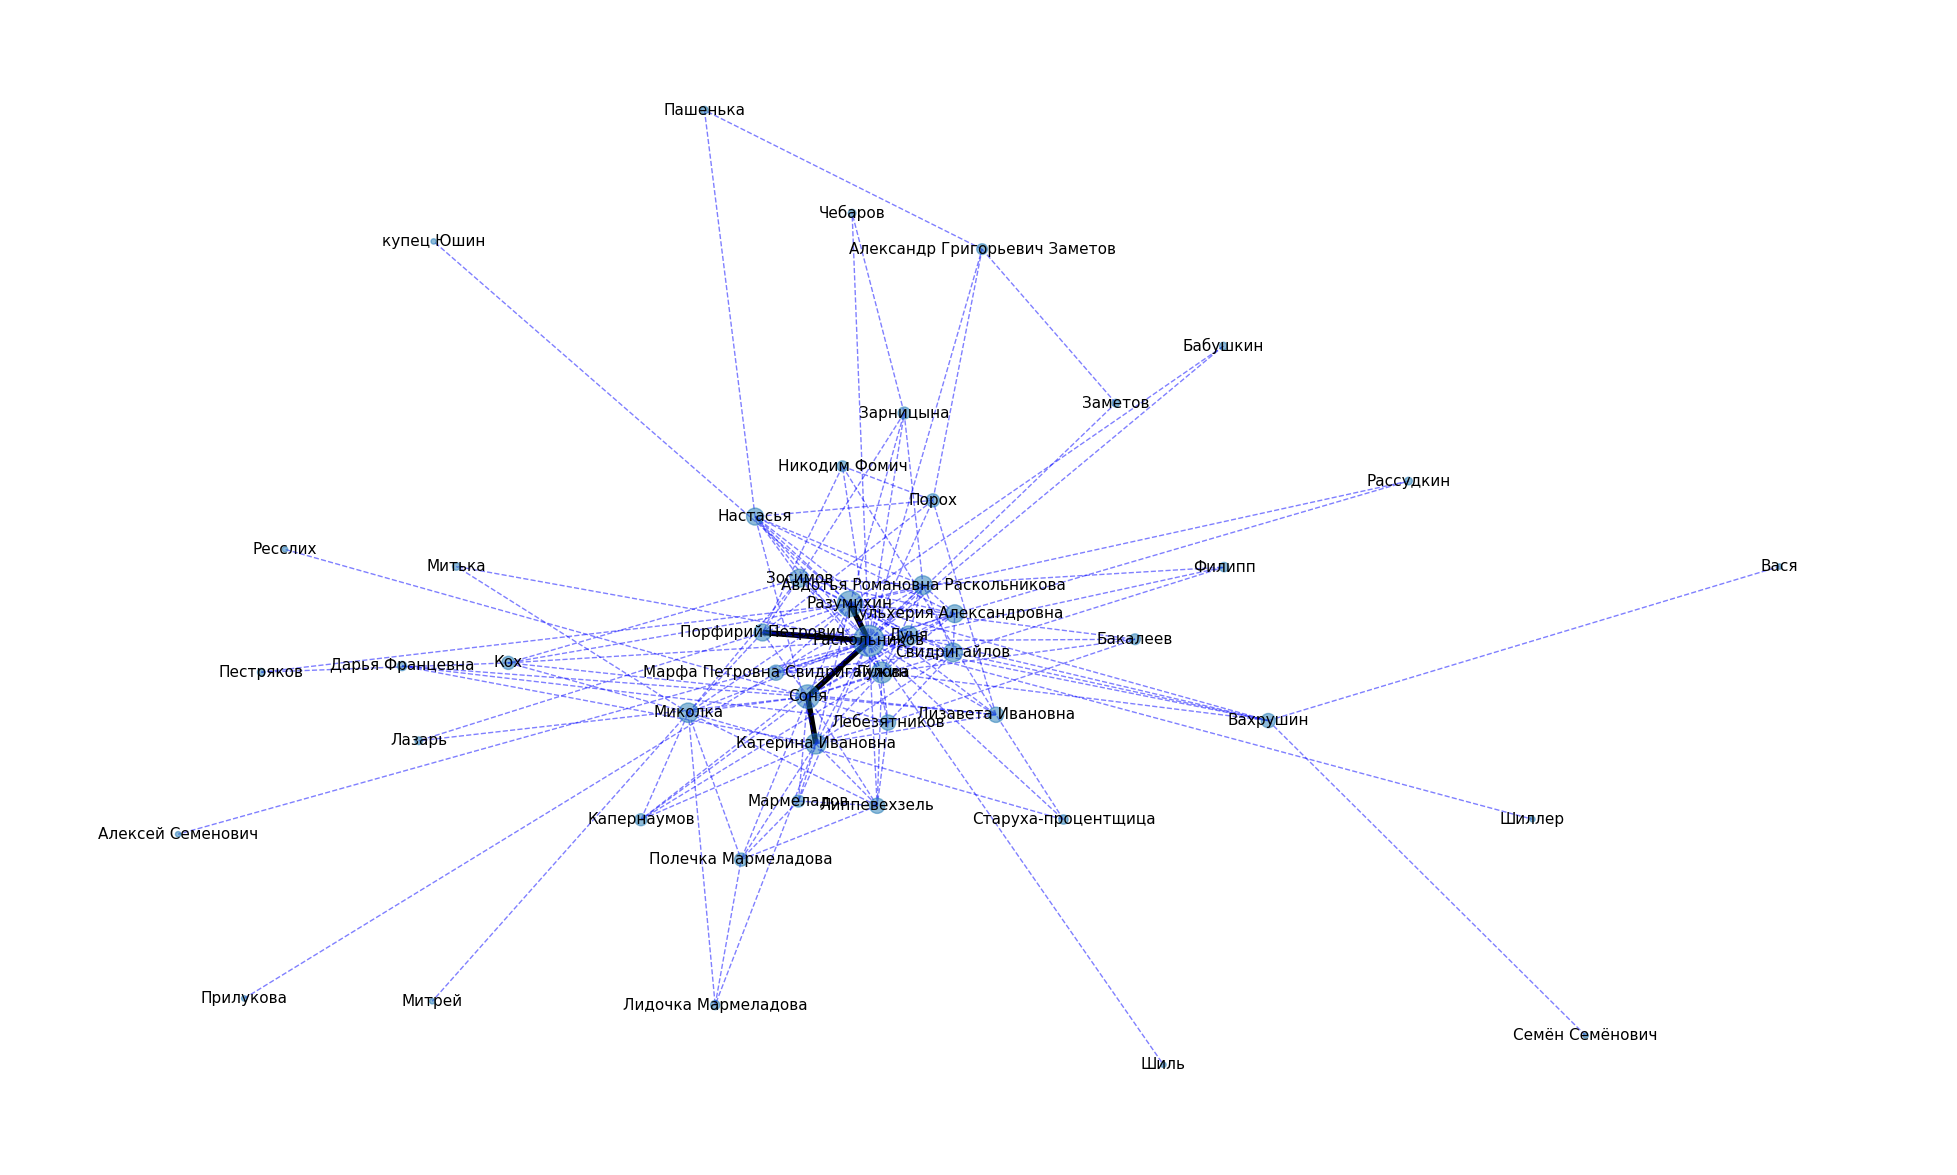

In [353]:
pos = nx.spring_layout(G)
plt.figure(figsize=(25, 15))

nx.draw_networkx_nodes(G, pos, node_size=sizes, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

plt.axis('off')
plt.show()

Да, метки накладываются иногда. Это исправимо (см. документацию при желании)

Мы, возможно, однажды посмотрим на графы подробнее. И, может быть, порисуем в Gephi красивые.

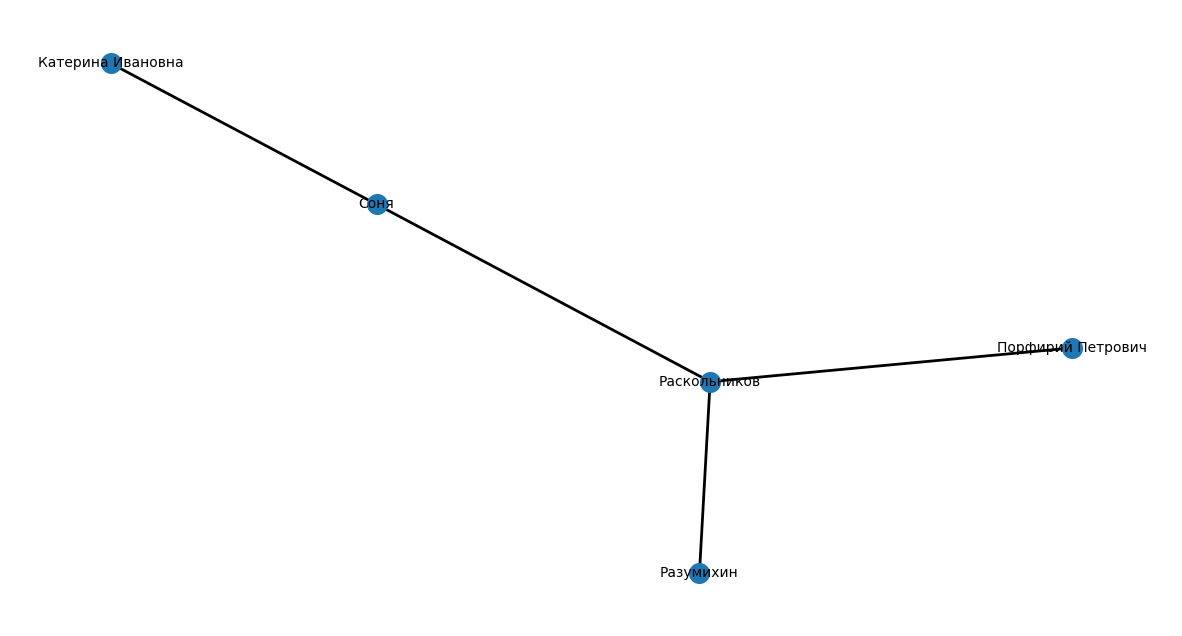

In [402]:
G2 = G.edge_subgraph(elarge)
pos = nx.spring_layout(G2)
plt.figure(figsize=(15, 8))

# рисуем вершины
nx.draw_networkx_nodes(G2, pos, node_size=200)

# рисуем популярные свзяи
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=2)

# подписи
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()